# Introduction

In this notebook, we will take a look how a linear regression problem can be solved by gradient descent algorithm as well as normal equation. We will use the data from Andrew Ng's Machine Learning course ([data source](https://www.coursera.org/learn/machine-learning/home/welcome)).  

**Problem description**:  
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.  
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

# 1. Understanding the data

## Visualize the data

In [1]:
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# we are under root directory 
data_df = pd.read_csv('dataset/ex1data1.txt',header=None, names=['population', 'profit'])

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
data_df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


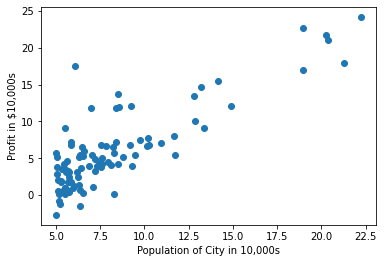

In [5]:
fig, ax = plt.subplots()
plt.scatter(data_df['population'], data_df['profit'])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

## Problem formulation

### Hypothesis

Given that the profit of a store is roughly proportional to the population of a city, we will make a hypothesis as following.   

$h(x) = \theta_0 + \theta_1 x$  

where $x$ is population of city and $h(x)$ is profit of a score.  

Our goal of the following sections to find $\theta_0$ and $\theta_1$ that best fit the data. 


### Cost function  
By best fitting the data, we mean minimizing the difference between the hypothesis output $h_\theta (x)$ and $y$. So goal is to 

$$\underset{\theta_0, \theta_1} {\text{min}}\ J(\theta_0, \theta_1)$$ 

where the cost function $J$ is  

$$ J(\theta_0, \theta_1) = \frac{1}{2m}\sum^{m}_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})^2 $$ 

here, $i$ is the index of data points. In our case, $i$ is from 1 to 97.

# 2. Solving with Normal Equation 

The simplest way to solve a linear regression porblem is using normal equation. The linear function of $y = \theta_0 + \theta_1 x$ can be written as following in the matrix representation: 
 

$y = \theta X$  

For this, the solution is 

$ \theta = (X^TX)^{-1}X^Ty $

Find the derivation and intuition from the readme file.

## Solve 

### defining and reshaping the data 

In [6]:
# define x and y 
x = data_df['population'].to_numpy() 
y = data_df['profit'].to_numpy()

# pad x with 1 for intercept term -> design matrix X. 
X = np.array([[1, xx] for xx in x])

# reshape y so it is in a vector from. array([1, 2, ..]) -> array([[1], [2], ..])
y = y.reshape(-1, 1)

In [7]:
X[:3]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186]])

In [8]:
y[:3]

array([[17.592 ],
       [ 9.1302],
       [13.662 ]])

### Find the solution

In [9]:
# define function to solve for X and y
def solve_normal_equation(X, y):
    XTX = np.transpose(X).dot(X)
    theta = np.linalg.inv(XTX).dot(np.transpose(X)).dot(y)
    return theta 

In [10]:
theta_norm = solve_normal_equation(X, y)

print("theta:")
print(theta_norm)

theta:
[[-3.89578088]
 [ 1.19303364]]


# 3. Solving with Gradient Descent

gradient descent is:
$$
Repeat \ until\ convergance \ \theta_j := \theta_j - \alpha \frac {\partial}{\partial \theta_j}J(\theta)
$$


## Solve

### Normalize features

Gradient Descent is susceptible to the scale of data because variable with big scale will dominate the gradient descent process. However, it doesn't matter much for this problem so we will not scale the data.

In [11]:
# feature normalization
x = data_df['population'].to_numpy()
y = data_df['profit'].to_numpy()

# x = (x - x.mean())/(x.max() - x.min())
# y = (y - x.mean())/(y.max() - y.min())

In [12]:
print("scaled x:")
print(x[:3])
print("scaled y:")
print(y[:3])

scaled x:
[6.1101 5.5277 8.5186]
scaled y:
[17.592   9.1302 13.662 ]


### Reshaping the data 

In [13]:
# pad x with 1 for intercept term -> design matrix X. 
X = np.array([[1, xx] for xx in x])

# reshape y so it is in a vector from. array([1, 2, ..]) -> array([[1], [2], ..])
y = y.reshape(-1, 1)

In [14]:
print("design matrix X:")
print(X[:3])
print("y:")
print(y[:3])

design matrix X:
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]]
y:
[[17.592 ]
 [ 9.1302]
 [13.662 ]]


## implement 

In [15]:
def compute_cost_function(X, y, theta):
    h = compute_hypothesis(X, theta)
    j = ((h - y)**2).mean()/2
    return j

def compute_derivative(X, y, theta):
    m = len(y)
    # fundction to calculate partial derivative of J with respect to theta
    delta_theta0 = 1/m * ((compute_hypothesis(X, theta)-y)*X[:, 0].reshape(-1, 1)).mean()
    delta_theta1 = 1/m * ((compute_hypothesis(X, theta)-y)*X[:, 1].reshape(-1, 1)).mean()
    return np.array([[delta_theta0], [delta_theta1]])

def compute_hypothesis(X, theta):
    # function to calculate h(x) given x and theta
    h = np.matmul(X, theta)
    return h

def initialize_theta(n):
    theta = np.array([random.random() for r in range(n)]).reshape(-1, 1)
    return theta

def gradient_descent(X, y, learning_rate, iterations, epsilon): 
    
    # initialize params 
    
    theta = initialize_theta(2)
    print('initial theta:')
    print(theta)
    print()

    j_list = []
    for i in tqdm(range(iterations)): 
        # update theta 
        delta = compute_derivative(X, y, theta)
        theta -= learning_rate * delta

        # check J 
        j = compute_cost_function(X, y, theta)
        j_list.append(j)
        
        
        if i >= 2:
            j_diff = j_list[-2] - j_list[-1]
            if j_diff < epsilon:
                print(f"delta J ({j_diff}) is smaller than epsilon ({epsilon}). Finishing the process at {i}.")
                return theta, j_list
            
    return theta, j_list
     
theta_grad, j_list = gradient_descent(X, y, learning_rate = 1, iterations=2000, epsilon=0.0001)
print("final theta:")
print(theta_grad)

 59%|█████▉    | 1186/2000 [00:00<00:00, 10944.39it/s]

initial theta:
[[0.99063247]
 [0.23156954]]

delta J (9.979127920090036e-05) is smaller than epsilon (0.0001). Finishing the process at 1186.
final theta:
[[-3.35347127]
 [ 1.13855276]]


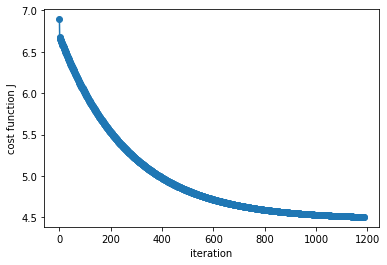

In [16]:
plt.plot(j_list, 'o-')
plt.xlabel("iteration")
plt.ylabel("cost function J")
plt.show()

# 4. Compare 

In [17]:
print("theta from normal equation: ")
print(theta_norm)

print("theta from gradient descent: ")
print(theta_grad)

theta from normal equation: 
[[-3.89578088]
 [ 1.19303364]]
theta from gradient descent: 
[[-3.35347127]
 [ 1.13855276]]
